# Методы решения нелинейных уравнений

## Подключение необходимых библиотек

In [82]:
# модули для математических операций
import math
import numpy as np
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

На примере уравнения $$2\sin3x = x^2 - 4x + 3$$ провести сравнительный анализ следующих методов решения нелинейных уравнений:
1. метод Ньютона с постоянной производной;
2. метод секущих;
3. метод Стеффенсена;
4. метод Чебышева третьего порядка.

### Постановка задачи

Пусть задана функция $f(x)$ действительного переменного $x \in \mathbb{R}$. Требуется найти корни уравнения $$f(x) = 0,$$
или, что то же самое, нули функции $f(x)$. 

Выясним, является ли задача корректно поставленной. Для ответа на вопрос существования и единственности решения введем теорему из математического анализа.

**Теорема**. *Если функция $f(x)$ непрерывна на отрезке $[a,b]$ и принимает на его концах значения разных знаков, то на этом отрезке существует по крайней мере один корень уравнения $f(x) = 0$.
Если при этом функция $f(x)$ будет монотонной на отрезке $[a,b]$, то она может иметь только один корень.*

В данном случае вопрос непрерывной зависимости от входных данных отпадает.

### Общее описание метода решения задачи

При решении таких уравнений численными методами, необходимо заниматься решением сразу двух задач:
1. отделение корней;
2. вычисление корней с требуемой точностью.

### Отделение корней

Данный этап будет общим для всех рассматриваемых методов, так как в независимости от используемого метода сами корни уравнения не меняют своего расположения на числовой прямой.

Отделять корни будем, используя графический метод.

Для начала определим исследуемую функцию. Пусть $$f(x) = 2\sin3x - x^2 + 4x -3 = 0,$$
то есть корни этого уравнения мы и будем искать. Сразу заметим, что эта функция непрерывная, так как является результатом сложения непрерывных функций.

In [3]:
def f(x):
    return 2*np.sin(3*x) - x**2 + 4*x - 3

Сперва изобразим графически две следующие функции:
$$y_1(x) = 2\sin3x,\quad y_2(x) = x^2 - 4x + 3.$$
Причем предположим, что отрезка $[-10; 10]$ для начала нам будет достаточно.

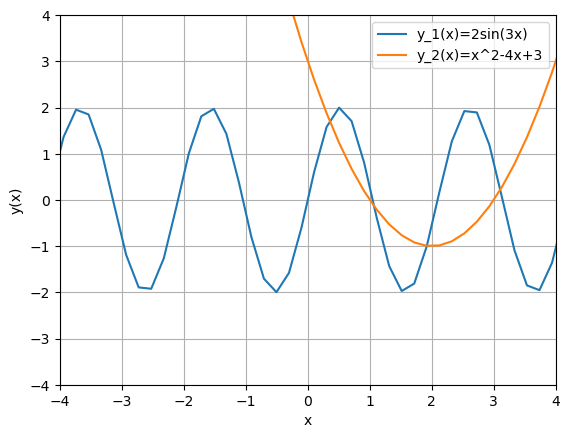

In [4]:
def y_1(x):
    return 2*np.sin(3*x)

def y_2(x):
    return x**2-4*x+3

x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, y_1(x), label='y_1(x)=2sin(3x)')
ax.plot(x, y_2(x), label='y_2(x)=x^2-4x+3')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Зная свойства параболы и синусоиды мы с уверенностью можем считать, что в данной плоскости два этих графика больше не пересекутся ни в какой другой точке кроме тех, что можно увидеть выше. Таким образом, исследуемое нами уравнение имеет 4 корня, причем, исходя из графика, эти корни лежат приблизительно в следующих отрезках:
$$[0; 0.75],\quad [0.75; 1.5],\quad [1.5; 2],\quad [3; 3.5].$$

Мы можем в этом убедиться, проверив выполнение введенной выше теоремы для каждого из отрезков.
Для этого определим первую производную исследуемой функции:
$$f'(x) = 6\cos3x - 2x + 4.$$
Причем эта функция непрерывная, так как является результатом сложения непрерывных функций.

In [5]:
def derivative_f(x):
    return 6*np.cos(3*x)-(2*x-4)

#### Проверка выполнения условий теоремы для каждого из отрезков

1. Рассмотрим отрезок $[0; 0.75]$

In [6]:
f(0)

-3.0

In [7]:
f(0.75)

0.9936463937758422

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на заданном отрезке.

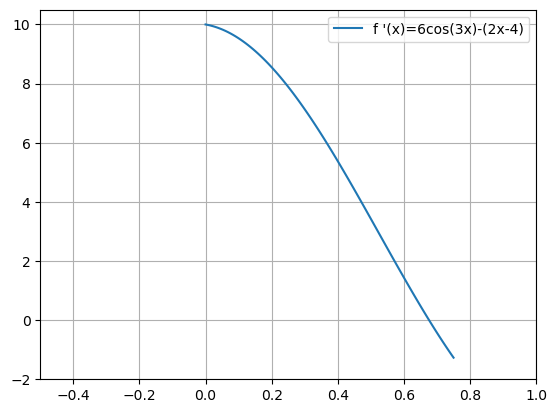

In [8]:
x = np.linspace(0, 0.75, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.set_xlim(-0.5, 1)
ax.set_ylim(-2, 10.5)
plt.legend()
plt.grid()
plt.show()

Первая производная меняет знак, поэтому определим вторую производную исследуемой функции:
$$f''(x) = -18\sin3x - 2.$$
Эта функция непрерывна, так как $\sin$ -- непрерывная функция

In [9]:
def second_derivative_f(x):
    return -18*np.sin(3*x) - 2

И построим график второй производной на выбранном отрезке.

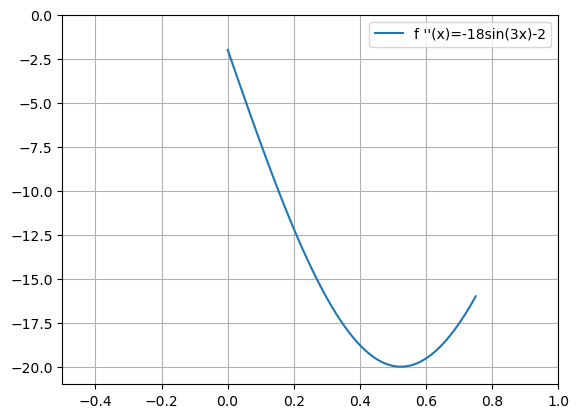

In [10]:
x = np.linspace(0, 0.75, 100)

fig, ax = plt.subplots()
ax.plot(x, second_derivative_f(x), label="f ''(x)=-18sin(3x)-2")
ax.set_xlim(-0.5, 1)
ax.set_ylim(-21, 0)
plt.legend()
plt.grid()
plt.show()

Вторая производная отрицательна на всем рассматриваемом отрезке, поэтому мы можем считать функцию на этом отрезке монотонно убывающей. А значит на этом отрезке существует единственный корень рассматриваемого уравнения.

2. Рассмотрим отрезок $[0.75; 1.5]$

In [11]:
f(1.5)

-1.205060235330194

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

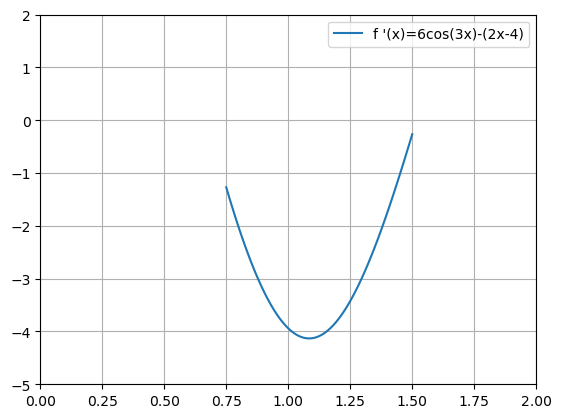

In [12]:
x = np.linspace(0.75, 1.5, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.set_xlim(0, 2)
ax.set_ylim(-5, 2)
plt.legend()
plt.grid()
plt.show()

На выбранном отрезке первая производная отрицательна, значит функция на этом отрезке монотонна, следовательно, корень на нем единственный.

3. Рассмотрим отрезок $[1.5; 2]$

In [13]:
f(2)

0.4411690036021483

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

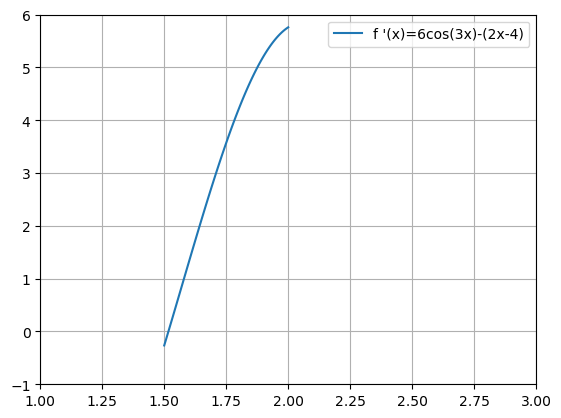

In [14]:
x = np.linspace(1.5, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.set_xlim(1, 3)
ax.set_ylim(-1, 6)
plt.legend()
plt.grid()
plt.show()

Первая производная меняет знак, поэтому построим график второй производной:

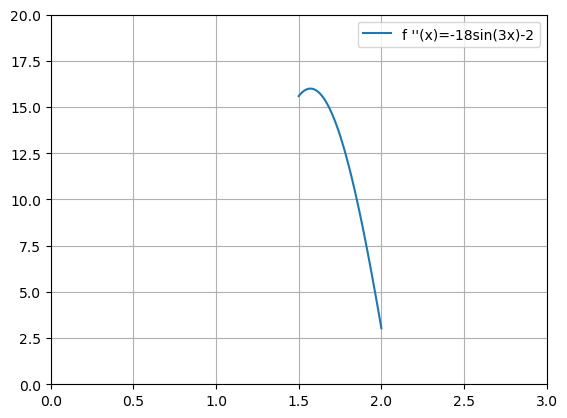

In [15]:
x = np.linspace(1.5, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, second_derivative_f(x), label="f ''(x)=-18sin(3x)-2")
ax.set_xlim(0, 3)
ax.set_ylim(0, 20)
plt.legend()
plt.grid()
plt.show()

Вторая производная положительна на всем рассматриваемом отрезке, поэтому мы можем считать функцию на этом отрезке монотонно возрастающей. А значит на этом отрезке корень единственный.

4. Рассмотрим отрезок $[3; 3.5]$

In [16]:
f(3)

0.8242369704835131

In [17]:
f(3.5)

-3.0093915199433408

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

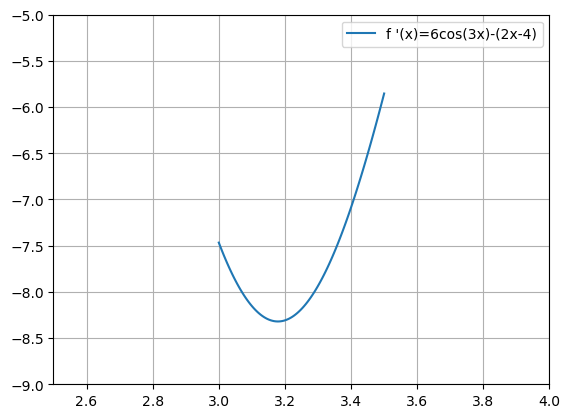

In [18]:
x = np.linspace(3, 3.5, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.set_xlim(2.5, 4)
ax.set_ylim(-9, -5)
plt.legend()
plt.grid()
plt.show()

На выбранном отрезке первая производная отрицательна, значит функция на этом отрезке монотонна, следовательно, корень на нем единственный.

#### Вывод

Таким образом, мы доказали, что выбранные нами разбиения числовой прямой содержат ровно по одному корню исследуемого уравнения. На этом решение задачи отделения корней можно закончить и переходить к отысканию приближенных значений корней, лежащих в этих отрезках с помощью указанных методов.

### Вычисление корней с требуемой точностью
Обусловимся тем, что мы будем заниматься отысканием корня из отрезка $[0, 0.75]$ для того, чтобы уменьшить размеры отчета в 4 раза. Этот корень будем приближать каждым рассматриваемым методом. Однако по аналогии можно найти приближения всех остальных корней, простым изменением рассматриваемого отрезка непосредственно в самом коде.

#### Метод Ньютона с постоянной производной

##### Описание метода

Формула этого метода имеет следующий вид $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^0)},\quad k=0,1,\ldots;\quad x^0.$$
Это видоизменение метода Ньютона напрямую связано с уменьшением количества арифметических операции, поскольку мы отказываемся от вычисления последовательности $f'(x^k)$. Таким образом, с точки зрения количества операций метод простой итерации и метод Ньютона становятся сравнимы между собой.
    
Геометрически это означает, что, выбрав $x^0$, мы движемся по касательной. Найдя $x^1$, мы будем двигаться из точки $x^1$ по той же касательной, т.е. все касательные будут параллельны касательной в точке, которая является начальным приближением к корню и так далее.

Но скорость сходимости данного метода ухудшится. Легко видеть, что погрешность на каждой итерации будет меняться по следующему закону $$\varepsilon_{k+1} = \varepsilon_k - \dfrac{f(x^* - \varepsilon_k)}{f'(x^0)}.$$
Проделав необходимые вычисления, связанные с разложением функции в окрестности $x^*$, можно получить $$\varepsilon_{k+1}\approx\Big(1 - \dfrac{f'(x^*)}{f'(x^0)}\Big)\varepsilon_k.$$
Исходя из вида полученной формулы, мы можем утверждать, что такой метод имеет линейную скорость сходимости.

##### Исследование сходимости метода

Выберем начальное приближение так $x^0$, чтобы выполнялись условия сходимости итерационного процесса:
1. Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$ При этом На концах отрезка $f(x)f'(x)\ne 0$.
2. Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$

In [57]:
x_0 = 0.3 # Изменять только этот параметр
print('x_0 =', x_0) 
h_0 = - f(x_0) / derivative_f(x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0 + 2*h_0, 1000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = 0.3
h_0 = 0.045352259347432526
s_0 = [ 0.3 ; 0.39070451869486506 ]


Функция $f(x)$ на отрезке $s_0$ непрерывна и дважды непрерывно дифференцируема на этом отрезке, так как она непрерывна и дважды непрерывно дифференцируема на всей числовой прямой. Рассмотрим значения на концах отрезка:

In [58]:
f(s_0[0])*derivative_f(s_0[0])

-2.305348269453279

In [59]:
f(s_0[-1])*derivative_f(s_0[-1])

1.4053422902597035

То есть первое условие сходимости выполнено. Рассмотрим второе условие:

In [60]:
M = np.max(np.absolute(second_derivative_f(s_0)))
M

18.58831666468141

In [61]:
2*np.absolute(h_0)*M <= np.absolute(derivative_f(x_0))

True

Оба условия сходимости выполнены, значит при выбранном начальном приближении $x^0$ итерационный процесс гарантировано будет сходящимся.

##### Программная реализация итерационного процесса

В первую очередь нам необходимо задать точность приближения решения. Пусть эта точность будет равна $$\varepsilon = 10^{-12}.$$

In [69]:
epsilon = 1e-12

Теперь реализуем сам итерационный процесс, который будет идти до тех пор, пока $$|x^{k+1} - x^{k}| \geq \varepsilon.$$
На каждом шаге мы будем выводить текущее значение $x^k$, а в конце выведем количество итераций, необходимое для достижения заданной точности приближения.

In [79]:
def phi(x):
    return x - f(x) / derivative_f(x_0)

x_k = x_0
x_k1 = phi(x_0)
iterations = 1
while np.absolute(x_k1 - x_k) >= epsilon:
    print(x_k1)
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations += 1
print(iterations)

0.3453522593474325
0.3477445709643091
0.34800750498477145
0.3480372619718521
0.34804064037852994
0.3480410240777921
0.3480410676578414
0.34804107260762807
0.34804107316982114
0.3480410732336746
0.348041073240927
12


Таким образом, мы смогли достичь заданной точности за 12 итераций, а заодно получили приближенный корень уравнения в выбранном нами отрезке.

#### Метод секущих

##### Описание метода

Возьмем за основу формулу производной $$f'(x^k)\approx \dfrac{f(x^k) -f(x^{k-1})}{x^{k} - x^{k-1}},\ k = 1,2,\ldots.$$
И, подставляя в формулу метода Ньютона, мы получим следующую формулу $$x^{k+1} = x^k - f(x^k)\dfrac{x^k - x^{k-1}}{f(x^k) - f(x^{k-1})},\ k = 1,2,\ldots;\ x^0.$$
Однако мы должны знать не только $x^0$, но и $x^1$, поэтому метод секущих двухшаговый.

Геометрически мы выбираем два приближения $x^0$ и $x^1$ и через две эти точки мы проводим прямую, и она является не касательной, а секущей. Таким образом, при пересечении секущей с осью $Ox$ мы получаем точку $x^2$. Проводим через $x^1$ и $x^2$ следующую секущую, получаем точку $x^3$ и так далее.

Количество операций в этом случае сравнимо с количеством операций метода Ньютона с постоянной производной. Но при этом мы выигрываем в скорости, покажем это. Мы имеем следующее уравнение для погрешности:
$$\varepsilon_{k+1} = \varepsilon_k - \dfrac{(\varepsilon_k - \varepsilon_{k+1})f(x^* - \varepsilon_k)}{f(x^* - \varepsilon_k) - f(x^* - \varepsilon_{k-1})}.$$
После выделения главной части из формулы и приведения подобных слагаемых, мы получим соотношение между погрешностями $$\varepsilon_{k+1}\approx -\dfrac{1}{2} \dfrac{f''(x^*)}{f'(x^*)}\varepsilon_k\varepsilon_{k-1}.$$
Таким образом, она выше чем линейная, но ниже, чем квадратичная. Для уточнения необходимо преобразовать данную величину. Соотношение на $k+1$ и $k$ итерациях может быть оценено как $$\varepsilon_{k+1}\approx C\varepsilon_k^\alpha,\quad \alpha = \dfrac{1+\sqrt5}{2}.$$

##### Исследование сходимости метода
Так как метод секущих, как и метод Ньютона с постоянной производной, является модификацией метода Ньютона, то для обоснования сходимости метода используется все те же условия, что и в предыдущем методе. Поэтому мы обусловимся тем, что выберем начальное приближение $x^0$ такое же, как и предыдущем методе, для которого мы уже доказали, что метод будет сходящимся.

##### Программная реализация итерационного процесса
Точность приближения возьмем ту же, что и в предыдущем методе, для того, чтобы сравнить оба метода между собой. Аналогичным образом реализуем итерационный процесс.

Но только в данном случае нам необходимо заранее задать еще $x^1$, которое мы возьмем как середину отрезка $s_0$, то есть $$x^1 = x^0 - \dfrac{f(x_0)}{f'(x_0)} = x^0 + h_0,\quad f'(x_0) \ne 0.$$

In [80]:
def phi(x_k, x_k1):
    return x_k - f(x_k) * (x_k - x_k1) / (f(x_k) - f(x_k1))

x_k = x_0
x_k1 = x_0 + h_0
x_k2 = phi(x_k, x_k1)
iterations = 1
while np.absolute(x_k1 - x_k) >= epsilon:
    print(x_k2)
    x_k = x_k1
    x_k1 = x_k2
    x_k2 = phi(x_k, x_k1)
    iterations += 1
print(iterations)

0.34787779167742866
0.3480404665818167
0.34804107310427773
0.3480410732418561
0.3480410732418563
6


В данном случае мы смогли достичь нужной нам точности за 6 итераций, что оказалось в 2 раза меньше, чем в предыдущем методе. Таким образом, мы действительно выиграли в скорости по сравнению с методом Ньютона с постоянной производной. Но, как было оговорено ранее, по количеству арифметических операций мы остались примерно на том же уровне.

#### Метод Стеффенсена


# Задача 2

Найти с точностью $\varepsilon = 10^{-6}$ наибольший по модулю корень уравнения $$\sum\limits_{i=0}^n a_ix^i = 0,$$ где вектор коэффициентов $a$ есть решение системы линейных алгебраических уравнений $$Aa = f$$ с $$A = \begin{pmatrix} 5 & -1.2 & 3.5 & 1 & -0.1\\ 1.1 & -9.8 & -1.1 & 0.1 & 2.3 \\ -1.1 & 3.1 & 13 & 2.5& 4.6 \\ 0.2& 0.3& 2.3& 15.6& 2\\ 0.1&-2.8 & 4 & 3.2& -17.8 \end{pmatrix},\quad f =\begin{pmatrix} 2\\ 0.6\\ 2.7\\ -3.4\\ 5 \end{pmatrix}$$

## Описание метода решения задачи

Данная задача разбивается на две задачи:
1. отыскание решения системы линейных уравнений;
2. численное отыскание наибольшего по модулю корня уравнения.

## Отыскание решения системы линейных уравнений;

Для решения системы линейных алгебраических уравнений воспользуемся методом Гаусса с выбором главного элемента по столбцу. Описание алгоритма данного метода мы опустим, так как эта задача решалась нами ранее.

In [62]:
def gaussian(matrix, column):
    insertions = 0 # Число перестановок
    A = matrix.copy() # Сохраняем переданную матрицу в локальную переменную
    b = column.copy() # Сохраняем переданный столбец в локальную переменную
    for k in range(A.shape[0]):
        leading_row = k # Столбец, в котором ведущий элемент, считаем равным номеру шага
        for i in range(k, A.shape[0]): # находим максимальный по модулю элемент в столбце
            if math.fabs(A[i][k]) > math.fabs(A[leading_row][k]):
                leading_row = i # Номер столбца с ведущим элементом принимает значение того, ...
                # ...в котором находится больший элемент, чем текущий ведущий элемент
        for j in range(k, A.shape[1]): # меняем местами строку, в которой главный элемент, со строкой равной номеру шага
            A[leading_row][j], A[k][j] =  A[k][j], A[leading_row][j]
        insertions+=1 # повышаем число перестановок
        
        # Прямой ход
        q = b[k] / A[k][k]
        for j in range(A.shape[0] - 1, k - 1, -1):
            c = A[k][j] / A[k][k]
            for i in range(A.shape[0] - 1, k, -1):
                    A[i][j] = A[i][j] - A[i][k]*c
                    if j == A.shape[0] - 1:
                        b[i] = b[i] - A[i][k]*q
    
    # Обратный ход
    x=np.zeros(A.shape[0]) # Создаем итоговый вектор решений, заполненный нулями
    for i in range(A.shape[0]-1, -1, -1):
        summary = 0
        for j in range(i+1, A.shape[0]):
            summary += A[i][j]*x[j]
        x[i] = (b[i] - summary) / A[i][i]
    
    return x;

In [64]:
A = np.array([[5, -1.2, 3.5, 1, -0.1],
              [1.1, -9.8, 1.1, 0.1, 2.3],
              [-1.1, 3.1, 13, 2.5, 4.6],
              [0.2, 0.3, 2.3, 15.6, 2],
              [0.1, -2.8, 4, 3.2, -17.8]])
f = np.array([2, 0.6, 2.7, -3.4, 5])

In [69]:
a = gaussian(A, f)
print(*a, sep='\n')

0.17447051397260402
-0.05768811593807447
0.3652265002213166
-0.2431188149940585
-0.23247755230740738


In [70]:
def f(x):
    f = 0
    n = a.shape[0]
    for i in range(n):
        f += x**i * a[i]
    return f